# Bike Sales Overview
## By Chris Gabriel

The objective of this project is to create a sales report providing visualizations with the data provided. 

In [151]:
import pandas as pd
import numpy as np #linear algebra 
import matplotlib.pyplot as plt

In [152]:
#import data
sales = pd.read_csv('/Users/chrisgabriel/Downloads/sales_data.csv')
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [153]:
# observig the data set
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# Plot Data

In [154]:
# customer age mean
sales['Customer_Age'].mean()

35.91921157861212

The average bike customer is around 35-36 years old. We can graph that.

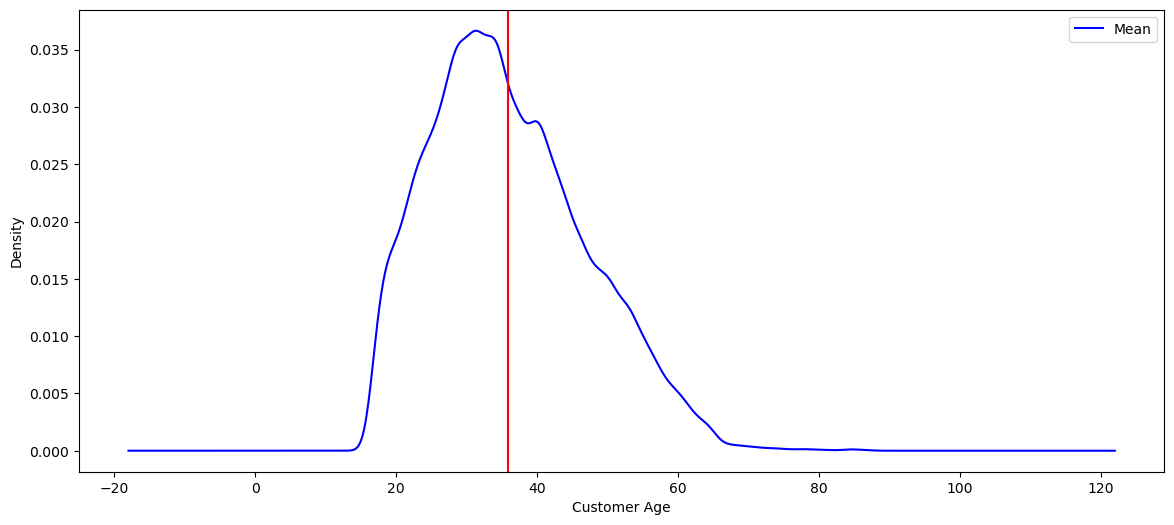

In [155]:
ay = sales['Customer_Age'].plot(kind='density', figsize=(14,6), color ='blue') # kde
mean = ay.axvline(sales['Customer_Age'].mean(), color = 'red')
ay.set_xlabel('Customer Age')
plt.legend({'Mean':mean})

<AxesSubplot:title={'center':'Customer Age Boxplot'}>

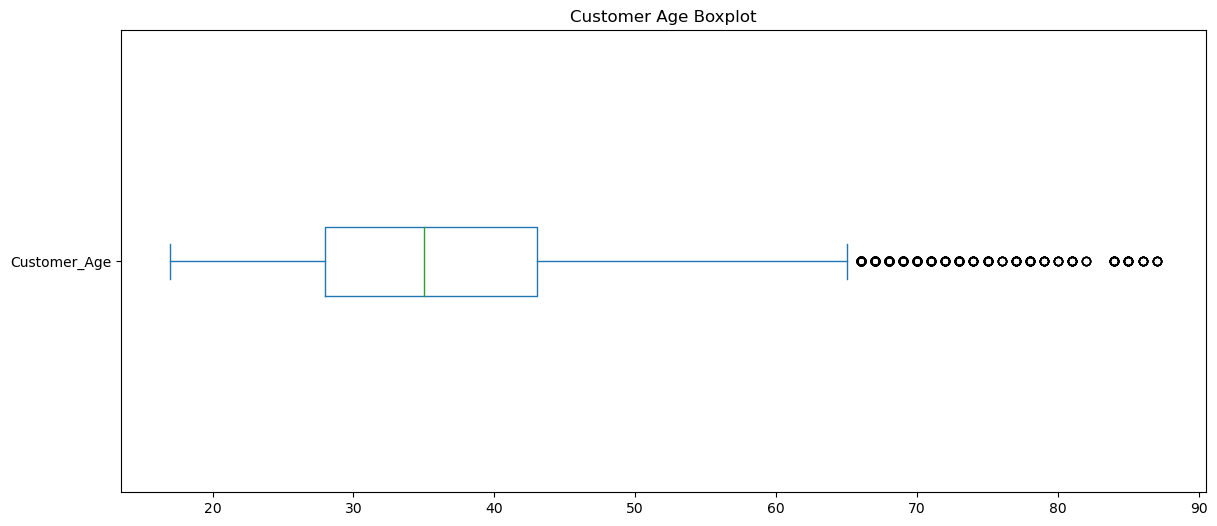

In [156]:
#box plot customer age
sales['Customer_Age'].plot(kind='box',
                              title= 'Customer Age Boxplot',
                           figsize=(14,6), vert = False)

The dots outside the model are the outliers, meaning "not-so-typical" customers. We can filter these and study to cater to that age demographic. 

In [157]:
sales.loc[sales['Customer_Age']>=64].head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
124,2014-04-27,27,April,2014,67,Seniors (64+),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,145,90,235
125,2016-04-27,27,April,2016,67,Seniors (64+),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,73,45,118
134,2014-02-19,19,February,2014,87,Seniors (64+),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,107,90,197
135,2016-02-19,19,February,2016,87,Seniors (64+),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,120,160,135,295
702,2013-11-15,15,November,2013,64,Adults (35-64),F,United States,California,Accessories,Bike Stands,All-Purpose Bike Stand,8,59,159,775,472,1247


We can see many outliers. Earlier we had seen senior citizens purchase equipment. Senior citizens don't typically buy these products. 

Age_Group
Adults (35-64)          672417
Seniors (64+)             9877
Young Adults (25-34)    446875
Youth (<25)             216147
Name: Order_Quantity, dtype: int64

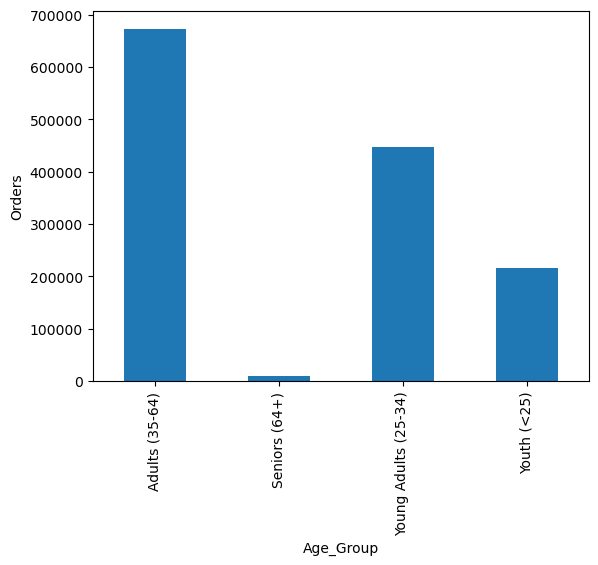

In [158]:
yz=sales.groupby(["Age_Group"])["Order_Quantity"].sum()
yz.plot(kind='bar', ylabel='Orders')
yz

Lets take a look at gender.

In [146]:
#sales by gender
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

We have about 4,000 more male clients. Lets see what men and women purchase. 

<AxesSubplot:xlabel='Customer Gender', ylabel='Orders'>

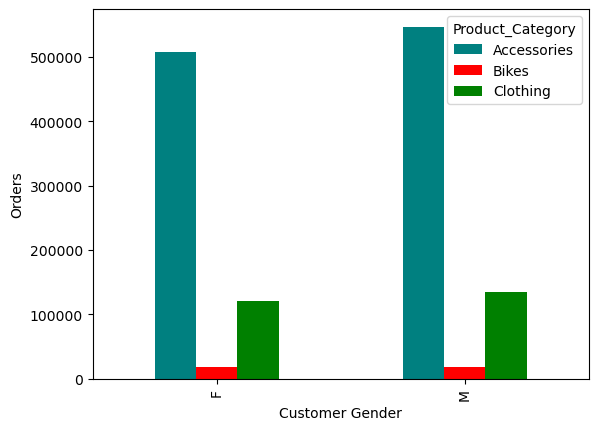

In [145]:
# creat a pivot table
tt= sales.pivot_table(values='Order_Quantity', index='Customer_Gender',
                    columns=['Product_Category'], aggfunc='sum')
tt.plot(kind='bar', color=['teal','red','green'],
       ylabel='Orders', xlabel='Customer Gender')

Both women and men like to purchase our accessories. 

#### Finding the avg. order quantity

In [131]:
sales['Order_Quantity'].mean()

11.901659648253654

Text(0, 0.5, '# of Orders')

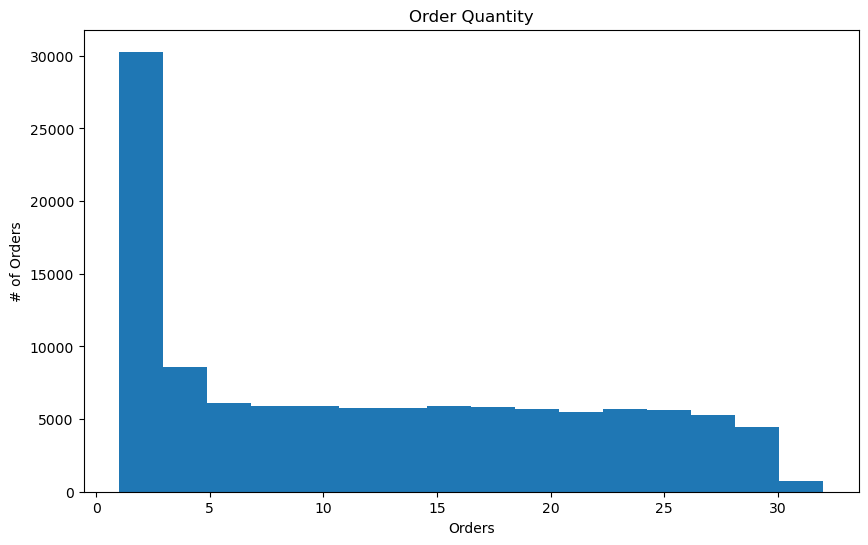

In [132]:
ax=sales['Order_Quantity'].plot(kind='hist', title = 'Order Quantity', 
                             bins=16, figsize=(10,6))
ax.set_xlabel('Orders')
ax.set_ylabel('# of Orders')

Customers typically order around 1-5 products per transaction.

#### How many orders were made per sub-categories?

In [65]:
# create a pivot table to help identify which product was ordered and how many times it was ordered 
sales.pivot_table(values='Order_Quantity', index=['Product_Category','Sub_Category'],
                    columns='Year', aggfunc='sum', margins=True)

Year                                  2011    2012      2013      2014  \
Product_Category Sub_Category                                            
Accessories      Bike Racks            NaN     NaN    1044.0    1388.0   
                 Bike Stands           NaN     NaN     670.0     582.0   
                 Bottles and Cages     NaN     NaN   50633.0   71916.0   
                 Cleaners              NaN     NaN    5941.0    8041.0   
                 Fenders               NaN     NaN   14164.0   17348.0   
                 Helmets               NaN     NaN   40592.0   51597.0   
                 Hydration Packs       NaN     NaN    4781.0    5314.0   
                 Tires and Tubes       NaN     NaN  113317.0  147452.0   
Bikes            Mountain Bikes     1245.0  1230.0    2088.0    1724.0   
                 Road Bikes         4015.0  4124.0    2797.0    1856.0   
                 Touring Bikes         NaN     NaN     825.0    1024.0   
Clothing         Caps                  NaN     NaN   14337.0   19800.0   
                 Gloves                NaN     NaN    8797.0   11499.0   
                 Jerseys               NaN     NaN   20520.0   24167.0   
                 Shorts                NaN     NaN    7000.0    6784.0   
                 Socks                 NaN     NaN    3846.0    5132.0   
                 Vests                 NaN     NaN    3435.0    3961.0   
All                                 5260.0  5354.0  294787.0  379585.0   

Year                                    2015      2016      All  
Product_Category Sub_Category                                    
Accessories      Bike Racks           1000.0    1309.0     4741  
                 Bike Stands           622.0     538.0     2412  
                 Bottles and Cages   49350.0   69827.0   241726  
                 Cleaners             5766.0    7826.0    27574  
                 Fenders             13802.0   16824.0    62138  
                 Helmets             39498.0   49919.0   181606  
                 Hydration Packs      4647.0    5172.0    19914  
                 Tires and Tubes    110155.0  143127.0   514051  
Bikes            Mountain Bikes       3124.0    2581.0    11992  
                 Road Bikes           4202.0    2777.0    19771  
                 Touring Bikes        1230.0    1569.0     4648  
Clothing         Caps                13916.0   19215.0    67268  
                 Gloves               8499.0   11183.0    39978  
                 Jerseys             19909.0   23529.0    88125  
                 Shorts               6786.0    6598.0    27168  
                 Socks                3729.0    4971.0    17678  
                 Vests                3282.0    3848.0    14526  
All                                 289517.0  370813.0  1345316

Now we can see how many products have been ordered per sub category. 

Text(0.5, 0, 'Products')

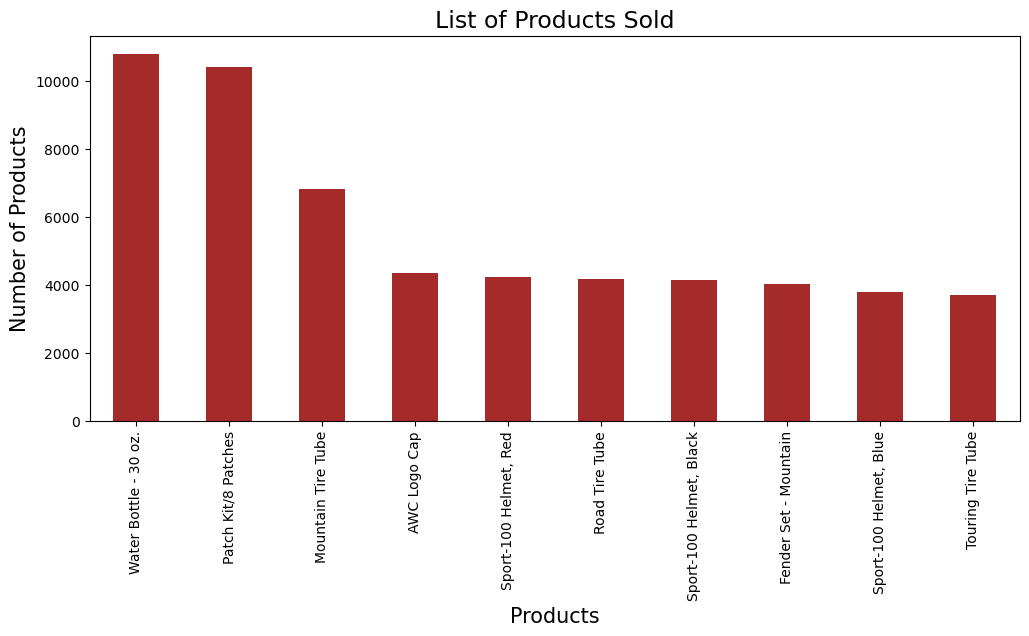

In [39]:
# displaying the top products
sales.loc[: ,"Product"].value_counts().head(10).plot(kind='bar',figsize=(12,5), color = 'brown')
plt.title("List of Products Sold",fontsize=17)
plt.ylabel("Number of Products",fontsize=15)
plt.xlabel("Products",fontsize=15)

Text(0.5, 1.0, 'Inventory Sold')

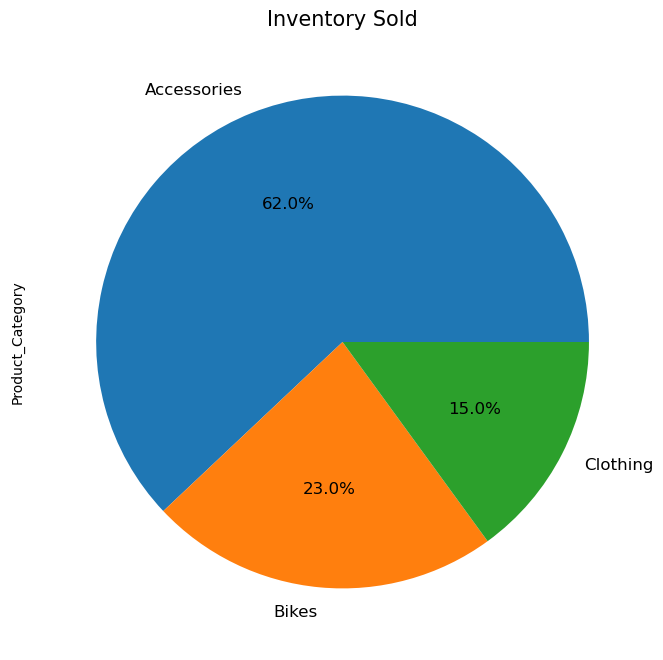

In [150]:
# pie chart
sales['Product_Category'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%', fontsize=12)
sub=sales['Product_Category'].unique()
plt.title("Inventory Sold",fontsize=15)

#### Finding sales per year

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

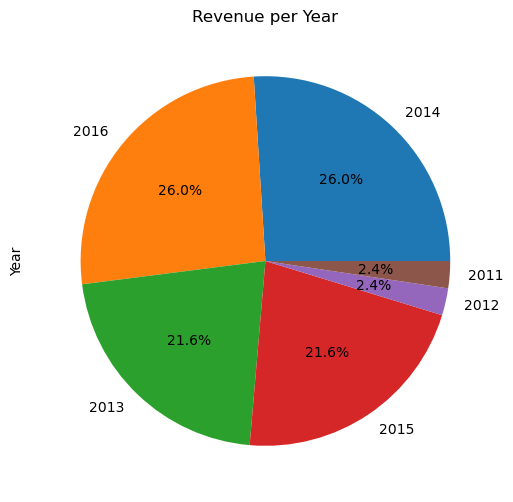

In [70]:
# pie chart
sales['Year'].value_counts().plot(kind='pie', 
                                  title = 'Revenue per Year', autopct='%1.1f%%', 
                                  figsize=(14,6))
sales['Year'].value_counts()

We can go more in-depth by finding which month typically has the best number of transactions. 

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

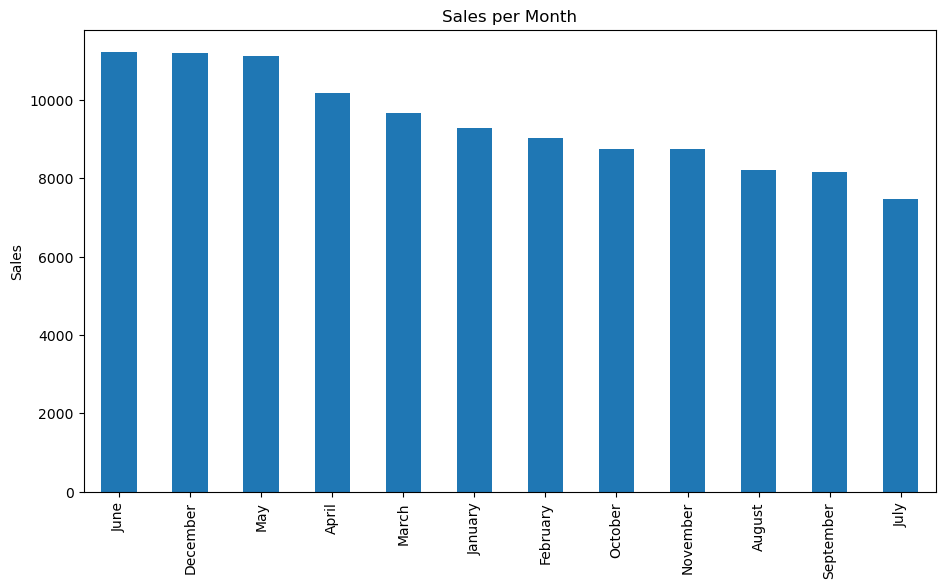

In [111]:
sales['Month'].value_counts().plot(kind='bar', 
                                  title = 'Sales per Month', 
                                  figsize=(11,6),
                                  ylabel='Sales')
sales['Month'].value_counts()

We can see June and December are the most impactful months. Market campaigns
should emphasize and target these months as they hold the most potential for sales.

Special promotions should be made for the month of July due to low generated sales.

#### Which country has the highest number of sales?

In [68]:
# finding the country that has made the most revenue
sales[['Country','Revenue']].groupby('Country').sum()

,Revenue
Country,
Australia,21302059
Canada,7935738
France,8432872
Germany,8978596
United Kingdom,10646196
United States,27975547


United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

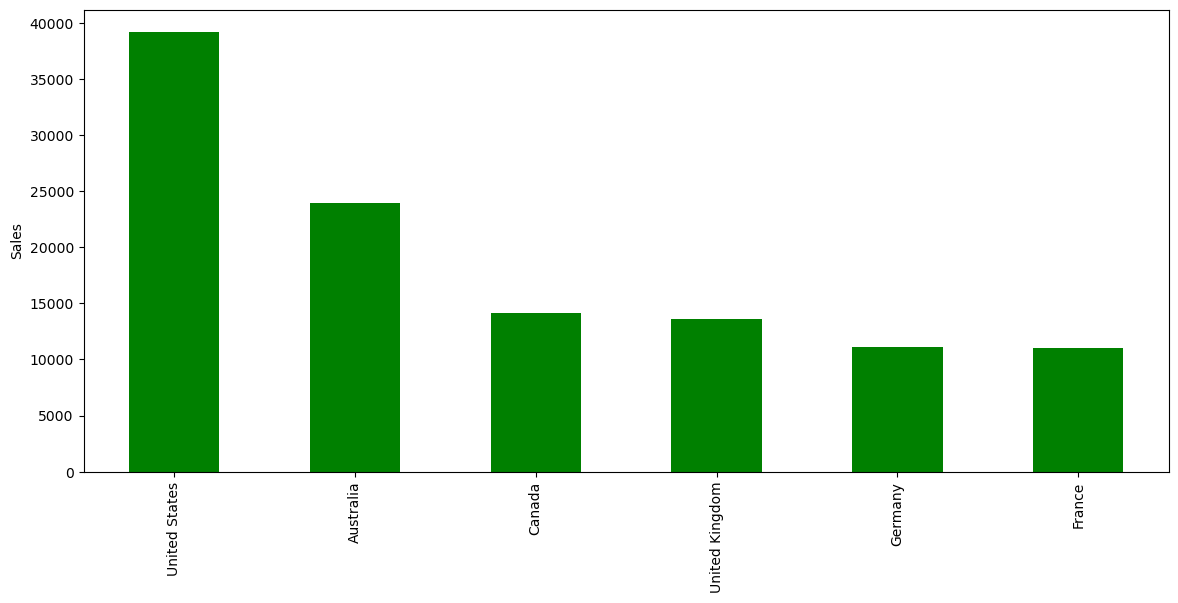

In [92]:
# displaying sales per country 
sales['Country'].value_counts().plot(kind='bar', color ='green',
                                     ylabel='Sales', figsize=(14,6))
sales['Country'].value_counts()

We observe that sales are strong in the USA and Australian markets but lack in other countries.

<AxesSubplot:title={'center':'Earnings per Country'}, xlabel='Year', ylabel='Profit'>

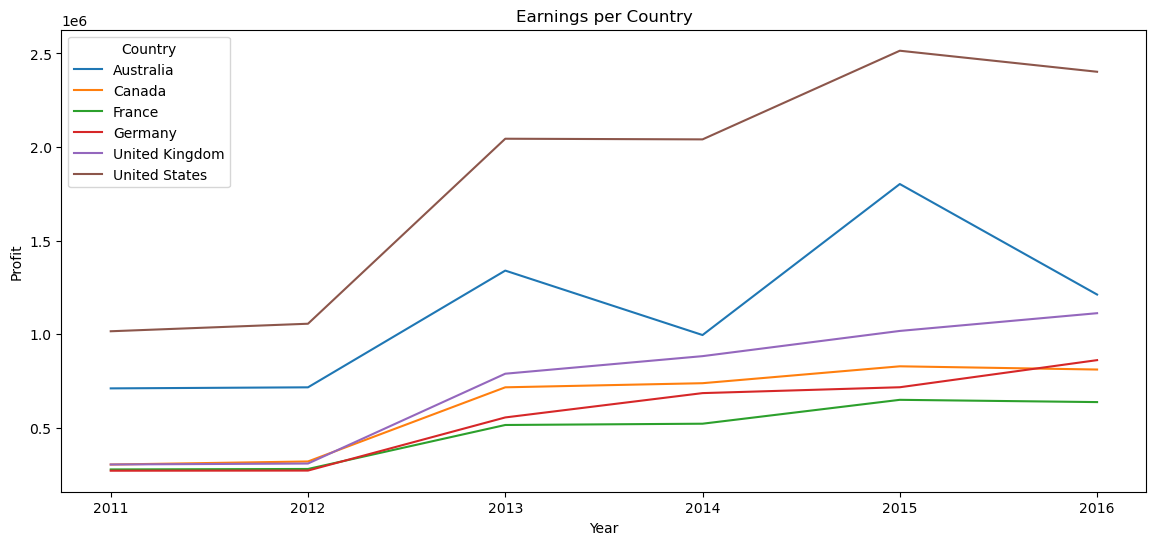

In [90]:
# created another pivot table this time with 'Profit' as values
ne= sales.pivot_table(values='Profit', index='Year',
                    columns='Country', aggfunc='sum')
ne.plot(title="Earnings per Country", ylabel = 'Profit',figsize= (14,6))

#### Creating a new variable Calculated_Date

In [135]:
# inupt a new column name
sales['Calculated_Date']=sales[['Year', 'Month', "Day"]].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), 
                                                               axis=1)

sales['Calculated_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113036 entries, 0 to 113035
Series name: Calculated_Date
Non-Null Count   Dtype 
--------------   ----- 
113036 non-null  object
dtypes: object(1)
memory usage: 883.2+ KB


We can see the date has been formed into a continuos variable, although I want python the recognize this as a DateTime object. 

In [136]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<AxesSubplot:title={'center':'Annual Transaction Rate'}, xlabel='Years', ylabel='Rate'>

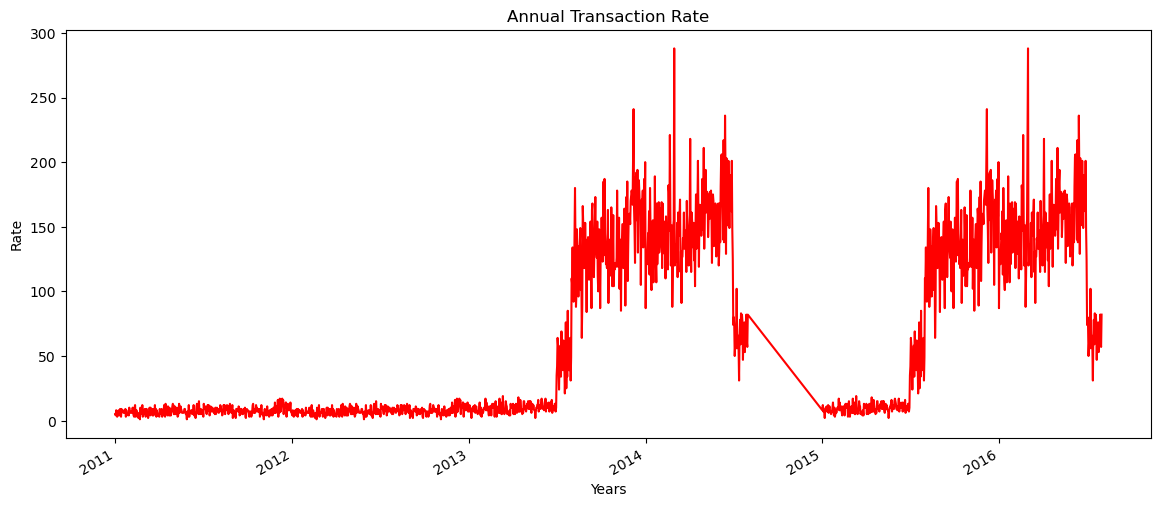

In [137]:
sales['Calculated_Date'].value_counts().plot(kind='line', 
                                             ylabel='Rate',
                                             xlabel='Years',
                                             title='Annual Transaction Rate',
                                             figsize=(14,6),
                                             color='red')

#### Accounting Visuals

<AxesSubplot:xlabel='Cost', ylabel='Profit'>

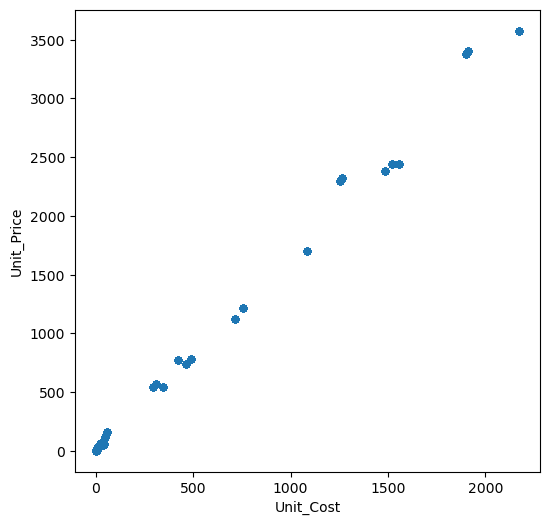

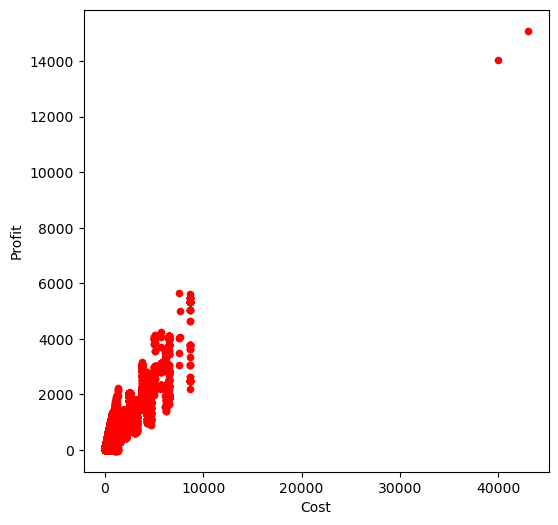

In [159]:
# creating a relationship bewteen Orders and Profit
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))
sales.plot(kind='scatter', x='Cost', y='Profit', figsize=(6,6), color='red')

Both graphs show a healthy relationship as the company can benefit from increased costs.

/var/folders/q5/h5kdcjf55m51m5jr8f4c6h0m0000gn/T/ipykernel_44418/3466599102.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  earnings=sales.groupby('Year')['Revenue', 'Profit', 'Cost'].sum().plot(kind='barh', title = 'Earnings')


<AxesSubplot:title={'center':'Earnings'}, ylabel='Year'>

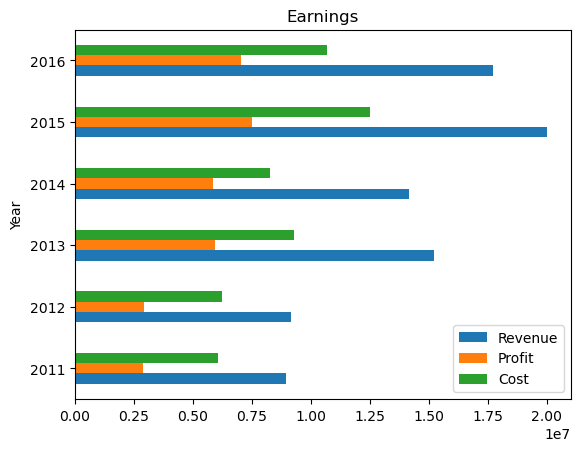

In [160]:
# comparing earnings and cost
earnings=sales.groupby('Year')['Revenue', 'Profit', 'Cost'].sum().plot(kind='barh', title = 'Earnings')
earnings

<AxesSubplot:xlabel='Year', ylabel='Profits'>

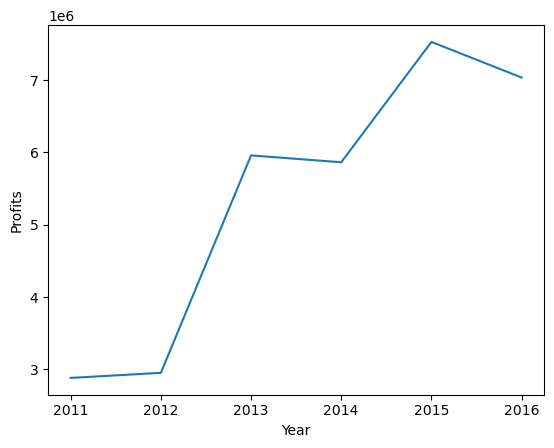

In [161]:
# visual of annual growth
profit=sales.groupby(["Year"])["Profit"].sum()
profit.plot(ylabel='Profits')


Profits have increased through the year, making this business practice optimal. 